In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouseStudyMerged = pd.DataFrame.merge(study_results, mouse_metadata, on="Mouse ID", how = "left")

# Display the data table for preview
mouseStudyMerged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
countMice =  pd.Series.nunique(mouseStudyMerged["Mouse ID"])
countMice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint, using .duplicated() function

duplicate_mouse_ids = mouseStudyMerged.loc[mouseStudyMerged.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids[0]


'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseData = mouseStudyMerged.loc[mouseStudyMerged["Mouse ID"] == duplicate_mouse_ids[0]]
duplicateMouseData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMouseDataMerged = mouseStudyMerged[mouseStudyMerged["Mouse ID"].isin(duplicate_mouse_ids)==False]
cleanMouseDataMerged


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleanMouseDataMerged["Mouse ID"].unique())


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [10]:
#create the mean variable
means = cleanMouseDataMerged.groupby("Drug Regimen").mean(["Tumor Volume (mm3)"])
means


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,21.565217,40.675741,0.713043,13.456522,19.965217
Ceftamin,19.747191,52.591172,1.179775,13.247191,27.398876
Infubinol,18.174157,52.884795,0.960674,16.230337,27.196629
Ketapril,19.707447,55.235638,1.297872,15.659574,27.861702
Naftisol,19.623656,54.331565,1.182796,12.000000,27.166667
Placebo,18.674033,54.033581,1.441989,10.734807,27.928177
Propriva,17.060811,52.320930,1.013514,10.006757,27.135135
Ramicane,21.425439,40.216745,0.548246,10.684211,19.679825
Stelasyn,19.226519,54.233149,0.872928,12.784530,27.856354


In [11]:
#create the median variable
median = cleanMouseDataMerged.groupby("Drug Regimen").median(["Tumor Volume (mm3)"])
median

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,20.0,41.557809,0.0,16.5,20.5
Ceftamin,20.0,51.776157,1.0,12.0,28.0
Infubinol,15.0,51.820584,1.0,20.0,27.0
Ketapril,20.0,53.698743,1.0,18.0,28.0
Naftisol,20.0,52.509285,1.0,9.0,27.0
Placebo,15.0,52.288934,1.0,10.0,28.0
Propriva,15.0,50.446266,1.0,7.5,26.0
Ramicane,20.0,40.673236,0.0,9.0,19.0
Stelasyn,20.0,52.431737,1.0,14.0,28.0


In [12]:
#create the variance variable
variance = cleanMouseDataMerged.groupby("Drug Regimen")
variance = variance["Tumor Volume (mm3)"]
variance = variance.var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
stddev = cleanMouseDataMerged.groupby("Drug Regimen")
stddev = stddev["Tumor Volume (mm3)"].std()
stddev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
stdErr = cleanMouseDataMerged.groupby("Drug Regimen")
stdErr = stdErr["Tumor Volume (mm3)"].sem()
stdErr

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#generate a summary dictionary
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": median["Tumor Volume (mm3)"],
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": stddev,
    "Tumor Volume Std. Err.": stdErr
}

df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = cleanMouseDataMerged.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
)
df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = cleanMouseDataMerged["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

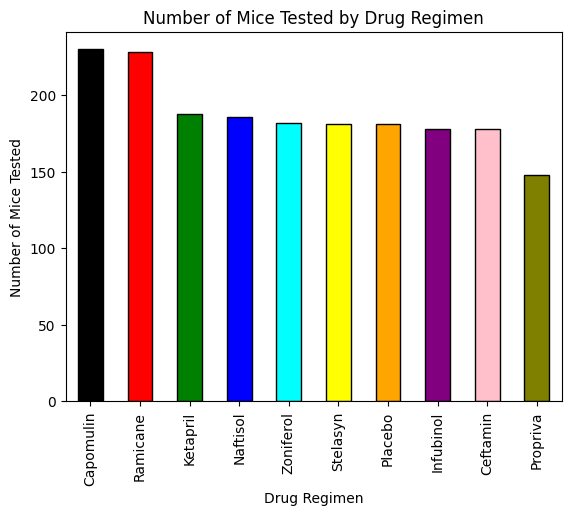

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts.plot(kind="bar",
           color=['black', 'red', 'green', 'blue', 'cyan','yellow', 'orange', 'purple', 'pink', 'olive', 'brown'],
           edgecolor='black')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()
           

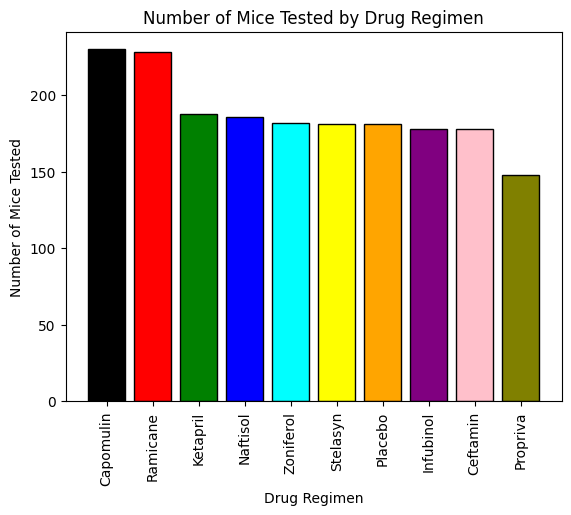

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values,
       color=['black', 'red', 'green', 'blue', 'cyan','yellow', 'orange', 'purple', 'pink', 'olive', 'brown'],
       edgecolor='black')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()
           

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#First group by Sex
sexMice = cleanMouseDataMerged["Sex"].value_counts()
sexMice

Sex
Male      958
Female    922
Name: count, dtype: int64

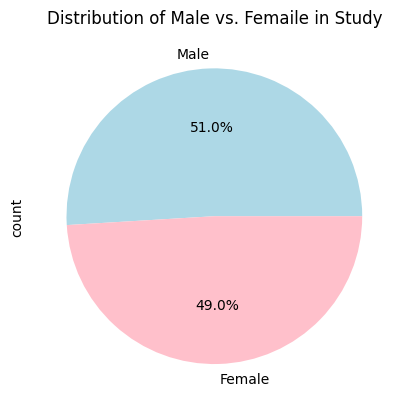

In [22]:
sexMice.plot(
        kind="pie",
        labels=sexMice.index.values,
        autopct="%1.1f%%",
        colors=['lightblue', 'pink'])

       
        
           

plt.title("Distribution of Male vs. Femaile in Study")
plt.show()

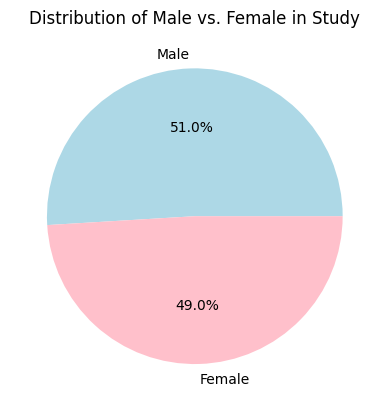

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    sexMice.values,
    labels=sexMice.index.values,
    colors=['lightblue', 'pink'],
    autopct = "%1.1f%%"
)


plt.title("Distribution of Male vs. Female in Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
#start by getting the last (greatest) timepoint for each mouse (max timepoint)
#group by the mouse ID ->get the max of the timepoint column.

maxTime = cleanMouseDataMerged.groupby("Mouse ID")["Timepoint"].max() #creates a series
#now convert to dataframe
maxTime = maxTime.reset_index()
maxTime.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [25]:
cleanMouseDataMerged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
#merge to keep data for teh max timepoints of each mouse only
merged_data = maxTime.merge(cleanMouseDataMerged, on=["Mouse ID", "Timepoint"], how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]




In [29]:
for treatment in treatment_list:

    info=merged_data.loc[merged_data["Drug Regimen"]==treatment]

info


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,a275,45,62.999356,3,Ceftamin,Female,20,28
21,b447,0,45.000000,0,Ceftamin,Male,2,30
22,b487,25,56.057749,1,Ceftamin,Female,6,28
25,b759,30,55.742829,1,Ceftamin,Female,12,25
58,f436,15,48.722078,2,Ceftamin,Female,3,25
75,h531,5,47.784682,0,Ceftamin,Male,5,27
88,j296,45,61.849023,3,Ceftamin,Female,24,30
94,k210,45,68.923185,3,Ceftamin,Male,15,28
106,l471,45,67.748662,1,Ceftamin,Female,7,28
107,l490,30,57.918381,3,Ceftamin,Male,24,26


In [30]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list:

    final_tumor_vol=merged_data.loc[merged_data["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
#add each series to the empty tumor volume list
    tumor_vol_list.append(final_tumor_vol)
    
tumor_vol_list


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [31]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list:

    final_tumor_vol=merged_data.loc[merged_data["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
#add each series to the empty tumor volume list
    tumor_vol_list.append(final_tumor_vol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    if len(outliers) ==0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output +=f"{o}"
        print(output)

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None


C:\Users\Amy\AppData\Local\Temp\ipykernel_29080\3644010541.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops, showmeans=True)


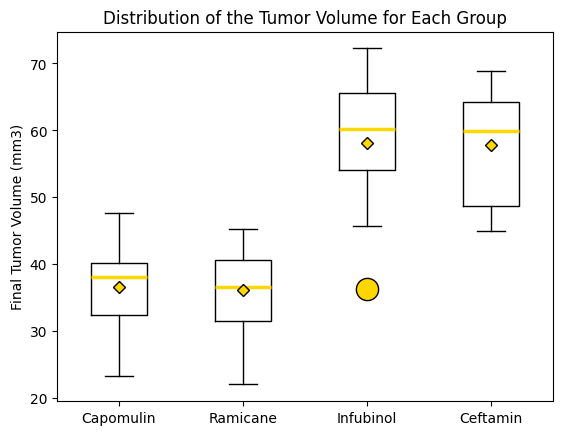

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#customize the outliers
flierprops = dict(marker='o', markerfacecolor='gold', markersize=16, markeredgecolor='black')

#customize median
medianprops = dict(linestyle='-', linewidth=2.5, color='gold')

#customize mean
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='gold')

plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops, showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distribution of the Tumor Volume for Each Group")
plt.show()


## Line and Scatter Plots

In [34]:
cleanMouseDataMerged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [35]:
#Identify a mouse treated with capomulin by creating a dataframe using .loc 
capomulinDF = cleanMouseDataMerged.loc[cleanMouseDataMerged["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
b128Data = capomulinDF.loc[capomulinDF["Mouse ID"] == "b128"]
b128Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


<function matplotlib.pyplot.show(close=None, block=None)>

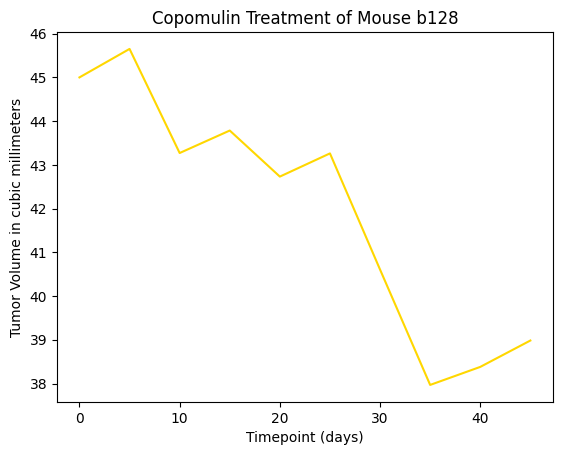

In [37]:
plt.plot(b128Data["Timepoint"],
         b128Data["Tumor Volume (mm3)"],
         color="gold")

plt.title("Copomulin Treatment of Mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel ("Tumor Volume in cubic millimeters")
plt.show

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinAverageDF = capomulinDF.groupby("Mouse ID").mean(["Tumor Volume (mm3)"])
capomulinAverageDF.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for teh Capomulin Regimen')

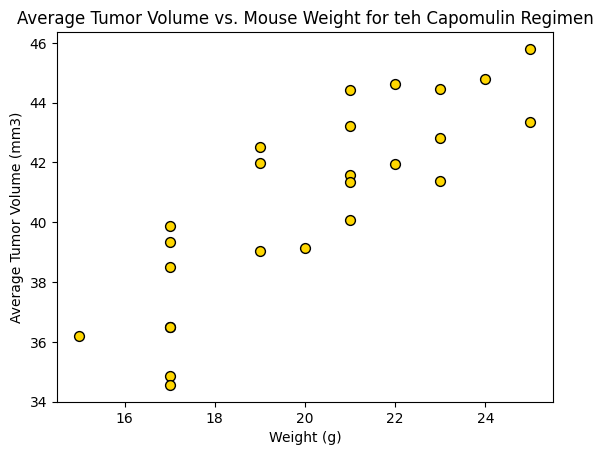

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(
    capomulinAverageDF["Weight (g)"],
    capomulinAverageDF["Tumor Volume (mm3)"],
    facecolor = "gold",
    edgecolor = "black",
    s=50

)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for teh Capomulin Regimen")


## Correlation and Regression

In [48]:
corr = st.pearsonr(capomulinAverageDF['Weight (g)'], capomulinAverageDF['Tumor Volume (mm3)'])[0]
print(f"The Correlation between mouse weight and teh average tumor volume is {corr:.2f}")

The Correlation between mouse weight and teh average tumor volume is 0.84


In [53]:
#create scatterplot

x_values = capomulinAverageDF['Weight (g)']
y_values = capomulinAverageDF['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinAverageDF['Weight (g)'], capomulinAverageDF['Tumor Volume (mm3)'])

regressValues = x_values * slope + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"




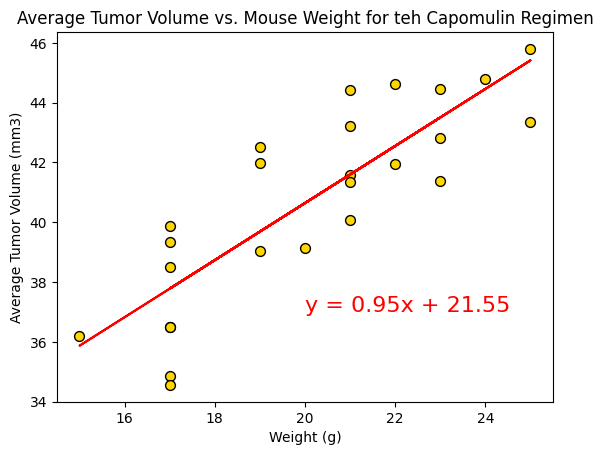

In [58]:
plt.scatter(x_values, y_values, facecolor = "gold", edgecolor = "black", s=50)

plt.plot(x_values, regressValues, "r-")
plt.annotate(lineEQ, (20, 37), fontsize=16, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for teh Capomulin Regimen")
plt.show()
